# Interpolation
Testing the interpolation functionality.

In [17]:
%matplotlib inline
from __future__ import print_function, division
import sbmlutils

     x    y      z
0  0.0  0.0  10.00
1  1.0  2.0   5.00
2  2.0  1.0   2.50
3  3.0  1.5   1.25
4  4.0  2.5   0.60
5  5.0  3.5   0.30


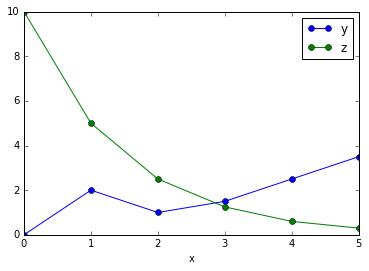

In [18]:
# load the data
import pandas as pd
data = pd.read_csv('../interpolation/data1.tsv', '\t')
print(data)

from matplotlib import pyplot as plt
plt.plot(data['x'], data['y'], '-o', label="y")
plt.plot(data['x'], data['z'], '-o', label="z")
plt.xlabel('x')
plt.legend();

// Created by libAntimony v2.9.0
model *Interpolation_constant()

  // Assignment Rules:
  y := piecewise((time >= 0) && (time < 1), 0, (time >= 1) && (time < 2), 2, (time >= 2) && (time < 3), 1, (time >= 3) && (time < 4), 1.5, (time >= 4) && (time < 5), 2.5, 0);
  z := piecewise((time >= 0) && (time < 1), 10, (time >= 1) && (time < 2), 5, (time >= 2) && (time < 3), 2.5, (time >= 3) && (time < 4), 1.25, (time >= 4) && (time < 5), 0.6, 0);

  // Other declarations:
  var y, z;
end



// Created by libAntimony v2.9.0
model *Interpolation_constant()

  // Assignment Rules:
  y := piecewise(0, time < 0, 0, (time >= 0) && (time < 1), 2, (time >= 1) && (time < 2), 1, (time >= 2) && (time < 3), 1.5, (time >= 3) && (time < 4), 2.5, (time >= 4) && (time < 5), 3.5, time >= 5, 0);
  z := piecewise(10, time < 0, 10, (time >= 0) && (time < 1), 5, (time >= 1) && (time < 2), 2.5, (time >= 2) && (time < 3), 1.25, (time >= 3) && (time < 4), 0.6, (time >= 4) && (time < 5), 0.3, time >= 5, 0);

  // Other declarations:
  var y, z;
end



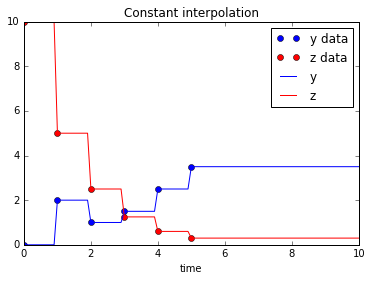

In [31]:
# simulate
import tellurium as te
r = te.loads('../interpolation/data1_constant.xml')
print(r.getAntimony())

# Simulate the interpolation
r.timeCourseSelections = ['time'] + r.getGlobalParameterIds()
s = r.simulate(0,10,steps=100)
# r.plot(s)

from matplotlib import pyplot as plt
plt.plot(data['x'], data['y'], 'o', label="y data", color="blue")
plt.plot(data['x'], data['z'], 'o', label="z data", color="red")
plt.plot(s['time'], s['y'], '-', label="y", color="blue")
plt.plot(s['time'], s['z'], '-', label="z", color="red")
plt.xlabel('time')
plt.title('Constant interpolation')
plt.legend();

// Created by libAntimony v2.9.0
model *Interpolation_linear()

  // Assignment Rules:
  y := piecewise(0 + 2*(time - 0), (time >= 0) && (time < 1), 2 + -1*(time - 1), (time >= 1) && (time < 2), 1 + 0.5*(time - 2), (time >= 2) && (time < 3), 1.5 + 1*(time - 3), (time >= 3) && (time < 4), 2.5 + 1*(time - 4), (time >= 4) && (time < 5), 3.5, time >= 5, 0);
  z := piecewise(10 + -5*(time - 0), (time >= 0) && (time < 1), 5 + -2.5*(time - 1), (time >= 1) && (time < 2), 2.5 + -1.25*(time - 2), (time >= 2) && (time < 3), 1.25 + -0.65*(time - 3), (time >= 3) && (time < 4), 0.6 + -0.3*(time - 4), (time >= 4) && (time < 5), 0.3, time >= 5, 0);

  // Other declarations:
  var y, z;
end



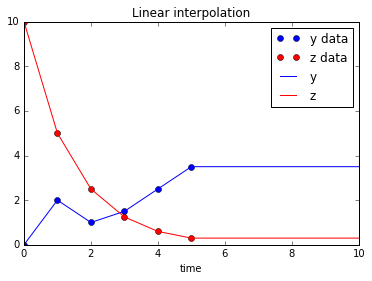

In [34]:
# simulate
import tellurium as te
r_linear = te.loads('../interpolation/data1_linear.xml')
print(r_linear.getAntimony())

# Simulate the interpolation
r_linear.timeCourseSelections = ['time'] + r_linear.getGlobalParameterIds()
s = r_linear.simulate(0,10,steps=100)

from matplotlib import pyplot as plt
plt.plot(data['x'], data['y'], 'o', label="y data", color="blue")
plt.plot(data['x'], data['z'], 'o', label="z data", color="red")
plt.plot(s['time'], s['y'], '-', label="y", color="blue")
plt.plot(s['time'], s['z'], '-', label="z", color="red")
plt.xlabel('time')
plt.title('Linear interpolation')
plt.legend();

// Created by libAntimony v2.9.0
model *Interpolation_cubic_spline()

  // Assignment Rules:
  y := piecewise(-0.901913875598*(time - 0)^3 + 0*(time - 0)^2 + 2.9019138756*(time - 0) + 0, (time >= 0) && (time <= 1), 1.50956937799*(time - 1)^3 + -2.70574162679*(time - 1)^2 + 0.196172248804*(time - 1) + 2, (time >= 1) && (time <= 2), -0.636363636364*(time - 2)^3 + 1.82296650718*(time - 2)^2 + -0.686602870813*(time - 2) + 1, (time >= 2) && (time <= 3), 0.0358851674641*(time - 3)^3 + -0.0861244019139*(time - 3)^2 + 1.05023923445*(time - 3) + 1.5, (time >= 3) && (time <= 4), -0.00717703349282*(time - 4)^3 + 0.0215311004785*(time - 4)^2 + 0.985645933014*(time - 4) + 2.5, (time >= 4) && (time <= 5), 0);
  z := piecewise(0.58995215311*(time - 0)^3 + 0*(time - 0)^2 + -5.58995215311*(time - 0) + 10, (time >= 0) && (time <= 1), -0.44976076555*(time - 1)^3 + 1.76985645933*(time - 1)^2 + -3.82009569378*(time - 1) + 5, (time >= 1) && (time <= 2), -0.0409090909091*(time - 2)^3 + 0.420574162679*(time -

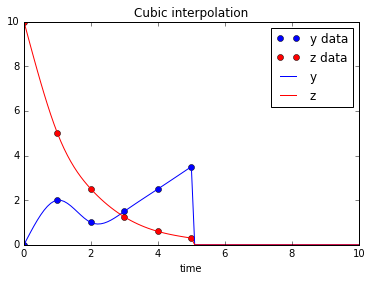

In [38]:
# simulate
import tellurium as te
r_cubic = te.loads('../interpolation/data1_cubic.xml')
print(r_cubic.getAntimony())

# Simulate the interpolation
r_cubic.timeCourseSelections = ['time'] + r_cubic.getGlobalParameterIds()
s = r_cubic.simulate(0,10,steps=100)

from matplotlib import pyplot as plt
plt.plot(data['x'], data['y'], 'o', label="y data", color="blue")
plt.plot(data['x'], data['z'], 'o', label="z data", color="red")
plt.plot(s['time'], s['y'], '-', label="y", color="blue")
plt.plot(s['time'], s['z'], '-', label="z", color="red")
plt.xlabel('time')
plt.title('Cubic interpolation')
plt.legend();

## Combining with models